In [22]:
import sys, os
sys.path.append(os.pardir)
# 부모 디렉토리에서 import할 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
# mnist data load할 수 있는 함수 import
from PIL import Image
import matplotlib.pyplot as plt

In [23]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False, normalize=False)
# training data, test data
# flatten: 이미지를 1차원 배열로 읽음
# normalize: 0~1 실수로. 그렇지 않으면 0~255
image = x_train[0]
label = t_train[0]
# 첫번째 데이터
print(label)
print(image.shape)


5
(1, 28, 28)


In [24]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
# image를 unsigned int로
image = image.reshape(28,28)
# 1차원 —> 2차원 (28x28)
#print(image.shape)
#img_show(image)

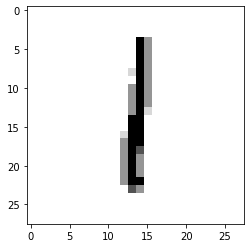

In [25]:
image = x_train[6640]
image = image.reshape(28,28)
plt.imshow(image,cmap ='Greys')
plt.show()

In [26]:
class knn:# KNN 클래스 구현부
    def __init__(self):
        self.target = []

    
    def KNN_weighted2(self,data1,k,train_data,train_target): #784개 feature를 1차원 배열로  reshape한 뒤에 knn 알고리즘을 쓰는함수
        weighted_target = []
        
        for data in data1: #받아오는 데이터 배열안의 데이터 하나를 먼저 계산
    
            distance = [] #각 트레인데이터와의 거리를 저장
            train_data1 = train_data.copy() #받아온 트레인데이타 카피하기(받아온 데이터 손상시키지않기위해)
            train_target1 = train_target.copy() #받아온 트레인타겟 카피하기(받아온 데이터 손상시키지않기위해)
            distance_total =np.zeros(9) # 각각의 label 즉 distance_total[0] 은 k범주 안에 있는 0의 갯수를 저장
            distance_mnist = 0 #테스트데이터와 트레인데이터의 거리를 구하기 위한 변수, feature의 거리차의 제곱을 저장한다.
            distance_raw = [] #두테이터의 차를 저장하는 리스트
            data1 = data.reshape(784) #디멘션을 1로 낮춘다. 즉 784개의 feature를 다 쓰기위함
            data = [] #계단 함수를 쓰기위한 리스트
            for a in range(len(data1)):  #계단함수
                if data1[a] > 0:
                    data.append(255)
                else:
                    data.append(data1[a])

                    
            for train_element in train_data1: #각각의 트레인데이터와 테스트데이터 거리비교
                train_element = train_element.reshape(784)
                
                
                for a in range(784): 
                    if train_element[a]>= data[a] :
                        distance_raw.append(train_element[a]-data[a])#차를 저장
                    if data[a] > train_element[a]:
                        distance_raw.append(data[a]-train_element[a])
                        
                for a in distance_raw:
                    distance_mnist = distance_mnist + np.square(a) # distance_raw에 저장돼있는 차를 제곱해서 다 더해줌
                
                distance.append(np.sqrt(distance_mnist)) #이 트레인데이터와의 유클리드 거리를 distance에 ㅈ저장
                distance_mnist = 0
                
                distance_raw = [] #리스트 초기화
                
            for a in range(k): #들어온 데이터와 가장 가까운 k개만큼 찾는loop
                distance_min = min(distance) #거리중에서 가장 작은 거리 찾기
                for b in range(len(distance)): #그 가장 작은 거리에있는 인덱스값(위치)찾기
                    if distance[b] == distance_min:
                        del distance[b] 
                        distance_weight = 1/(1+np.square(distance_min)) #거리에 가중치를 줌
                        for i in range(len(distance_total)): #레이벨별로 저장하는 loop 만약 가장 거리가 짧은 데이터의 label이 0이면 distance_total[0]에 저장
                            if train_target1[b] == i: 
                                distance_total[i] = distance_total[i] + distance_weight
                        train_target1 = np.delete(train_target1,b)
                        train_data1 = np.delete(train_data1,b)
                        break
            b = max(distance_total)
            for i in range(len(distance_total)):
                if distance_total[i] == b:
                    self.target.append(i) # 이 데이터에 대해서 k개중에 가장 많은 label을 저장
                    break

            
        weighted_target = self.target.copy()
        self.target.clear()
        return weighted_target
    
    def KNN_weighted3(self,data1,k,train_data,train_target): #raw 28개의 각각의 행의 합과 column 각각의 열의 합을 이용해서 knn을 구현
        weighted_target = []
        
        for data in data1:
            distance = []
            train_data1 = train_data.copy()
            train_target1 = train_target.copy() 
            distance_total =[0,0,0,0,0,0,0,0,0,0]
            distance_mnist = 0
            distance_raw = []
            data = data.reshape(28,28)
            #data =[]
            #for a in data1:
            #    for b in range(len(a)):
            #        if a[b] > 0:
            #            data2.append(255)
            #        else:
            #            data2.append(0)
            #    data.append(data2)
            #    data2 = []
            #print(data)
            #data = np.asarray(data)
            #print(data)
            raw_data1 =[] #데이터의 행의합을 저장시킬 리스트
            column_data1 = [] #열의 합을 저장시킬 리스트(테스트데이터 한개의)
            for data2 in data:
                raw_data1.append(sum(data2)) #행의합 저장

            for j in range(28):
                column_data1.append(sum(data[:,j])) #열의합 저장
            for train_element in train_data1:
                train_element = train_element.reshape(28,28) #28,28로 nparray로 reshape
                
                raw_train = [] #트레인데이터의 행의합 저장리스트
                column_train = []#열
                distance56 = [] # 테스트데이터의 행의합과 트레인의 행의합을 각각빼주고 제곱의 합을 저장하는 리스트 열도마찬가지.(0~25행의합 26~57 열의합의 차이)
                
                for train in train_element:
                    raw_train.append(sum(train))
                    
                for i in range(28):
                    column_train.append(sum(train_element[:,i]))
                    
                for a,b in zip(raw_data1,raw_train):
                    if a >= b:
                        distance56.append(np.square(a-b)) #데이터의 행의 합의 차의 제곱을 저장
                    if b > a:
                        distance56.append(np.square(b-a))
                for a,b in zip(column_data1,column_train):
                    if a >= b:
                        distance56.append(np.square(a-b)) #열의 합의 차의 제곱을 저장
                    if b > a:
                        distance56.append(np.square(b-a))
                   
                distance.append(np.sqrt(sum(distance56)))
                
            for a in range(k):
                distance_min = min(distance)
                for b in range(len(distance)):
                    if distance[b] == distance_min:
                        del distance[b]
                        distance_weight = 1/(1+np.square(distance_min)) #거리에 가중치를 줌
                        for i in range(len(distance_total)):
                            if train_target1[b] == i:
                                distance_total[i] = distance_total[i] + distance_weight
                        train_target1 = np.delete(train_target1,b)
                        train_data1 = np.delete(train_data1,b)
                        break
            b = max(distance_total)
            for i in range(len(distance_total)):
                if distance_total[i] == b:
                    self.target.append(i)
                    break

            
        weighted_target = self.target.copy()
        self.target.clear()
        return weighted_target

In [27]:
sample = np.random.randint(0,t_test.shape[0],10) #테스트해볼 몇개의 index값을 랜덤으로 추출
arr_data = []
arr_target = []
for a in sample: #index의 data와 target을 고름
    arr_data.append(x_test[a])
    arr_target.append(t_test[a])
    

In [28]:
model = knn() #모델은 knn
x_train = x_train[0:5000]
t_train = t_train[0:5000]

pridicted = model.KNN_weighted3(arr_data,10,x_train,t_train) #행의합,열의합으로 이루어진 데이터를 이용 56개사용. 실행시간이 빠르고 정확도도 높음.
for a in range(len(sample)):
    print(f"{sample[a]} th data = {pridicted[a]}   label = {arr_target[a]}\n" )
count = 0
for a,b in zip(pridicted,arr_target):
    if a == b:
        count = count+1
print(f"accuracy = {count/len(sample)*100 }%")

pridicted = model.KNN_weighted2(arr_data,10,x_train,t_train)#실행시간이 매우길다. 784개의 feature를 모두 사용하는 함수.
for a in range(len(sample)):
    print(f"{sample[a]} th data = {pridicted[a]}   label = {arr_target[a]}\n" )
count = 0
for a,b in zip(pridicted,arr_target):
    if a == b:
        count = count+1
print(f"accuracy = {count/len(sample)*100 }%")

2831 th data = 6   label = 6

6570 th data = 1   label = 3

8005 th data = 1   label = 1

5088 th data = 6   label = 6

6064 th data = 2   label = 2

8573 th data = 7   label = 7

3215 th data = 0   label = 0

2993 th data = 1   label = 7

3939 th data = 6   label = 6

8415 th data = 5   label = 5

accuracy = 80.0%
2831 th data = 6   label = 6

6570 th data = 3   label = 3

8005 th data = 1   label = 1

5088 th data = 0   label = 6

6064 th data = 2   label = 2

8573 th data = 7   label = 7

3215 th data = 0   label = 0

2993 th data = 8   label = 7

3939 th data = 6   label = 6

8415 th data = 0   label = 5

accuracy = 70.0%


[5 5 5 5 5 5 5 5 5 5]
